# Single Protein Analysis: Basic Usage
## Parsing
The first step of PyeMap analysis is parsing of a .cif or pdb file.

You can either provide PyeMap with the path to the file:

In [1]:
import pyemap
#my_emap = pyemap.parse("path/to/protein.pdb")

Or fetch from the RCSB database by 4 character PDB ID:

In [2]:
my_emap = pyemap.fetch_and_parse("1u3d")

Fetching PDB 1u3d from RSCB Database...
Success!
Parsing file: /Users/jamesrgayvert/Documents/work/emap/pyemap/examples/1u3d.pdb
Identified 3 non-protein ET active moieties.


Next, construct the graph model of the protein crystal structure using `pyemap.process()`

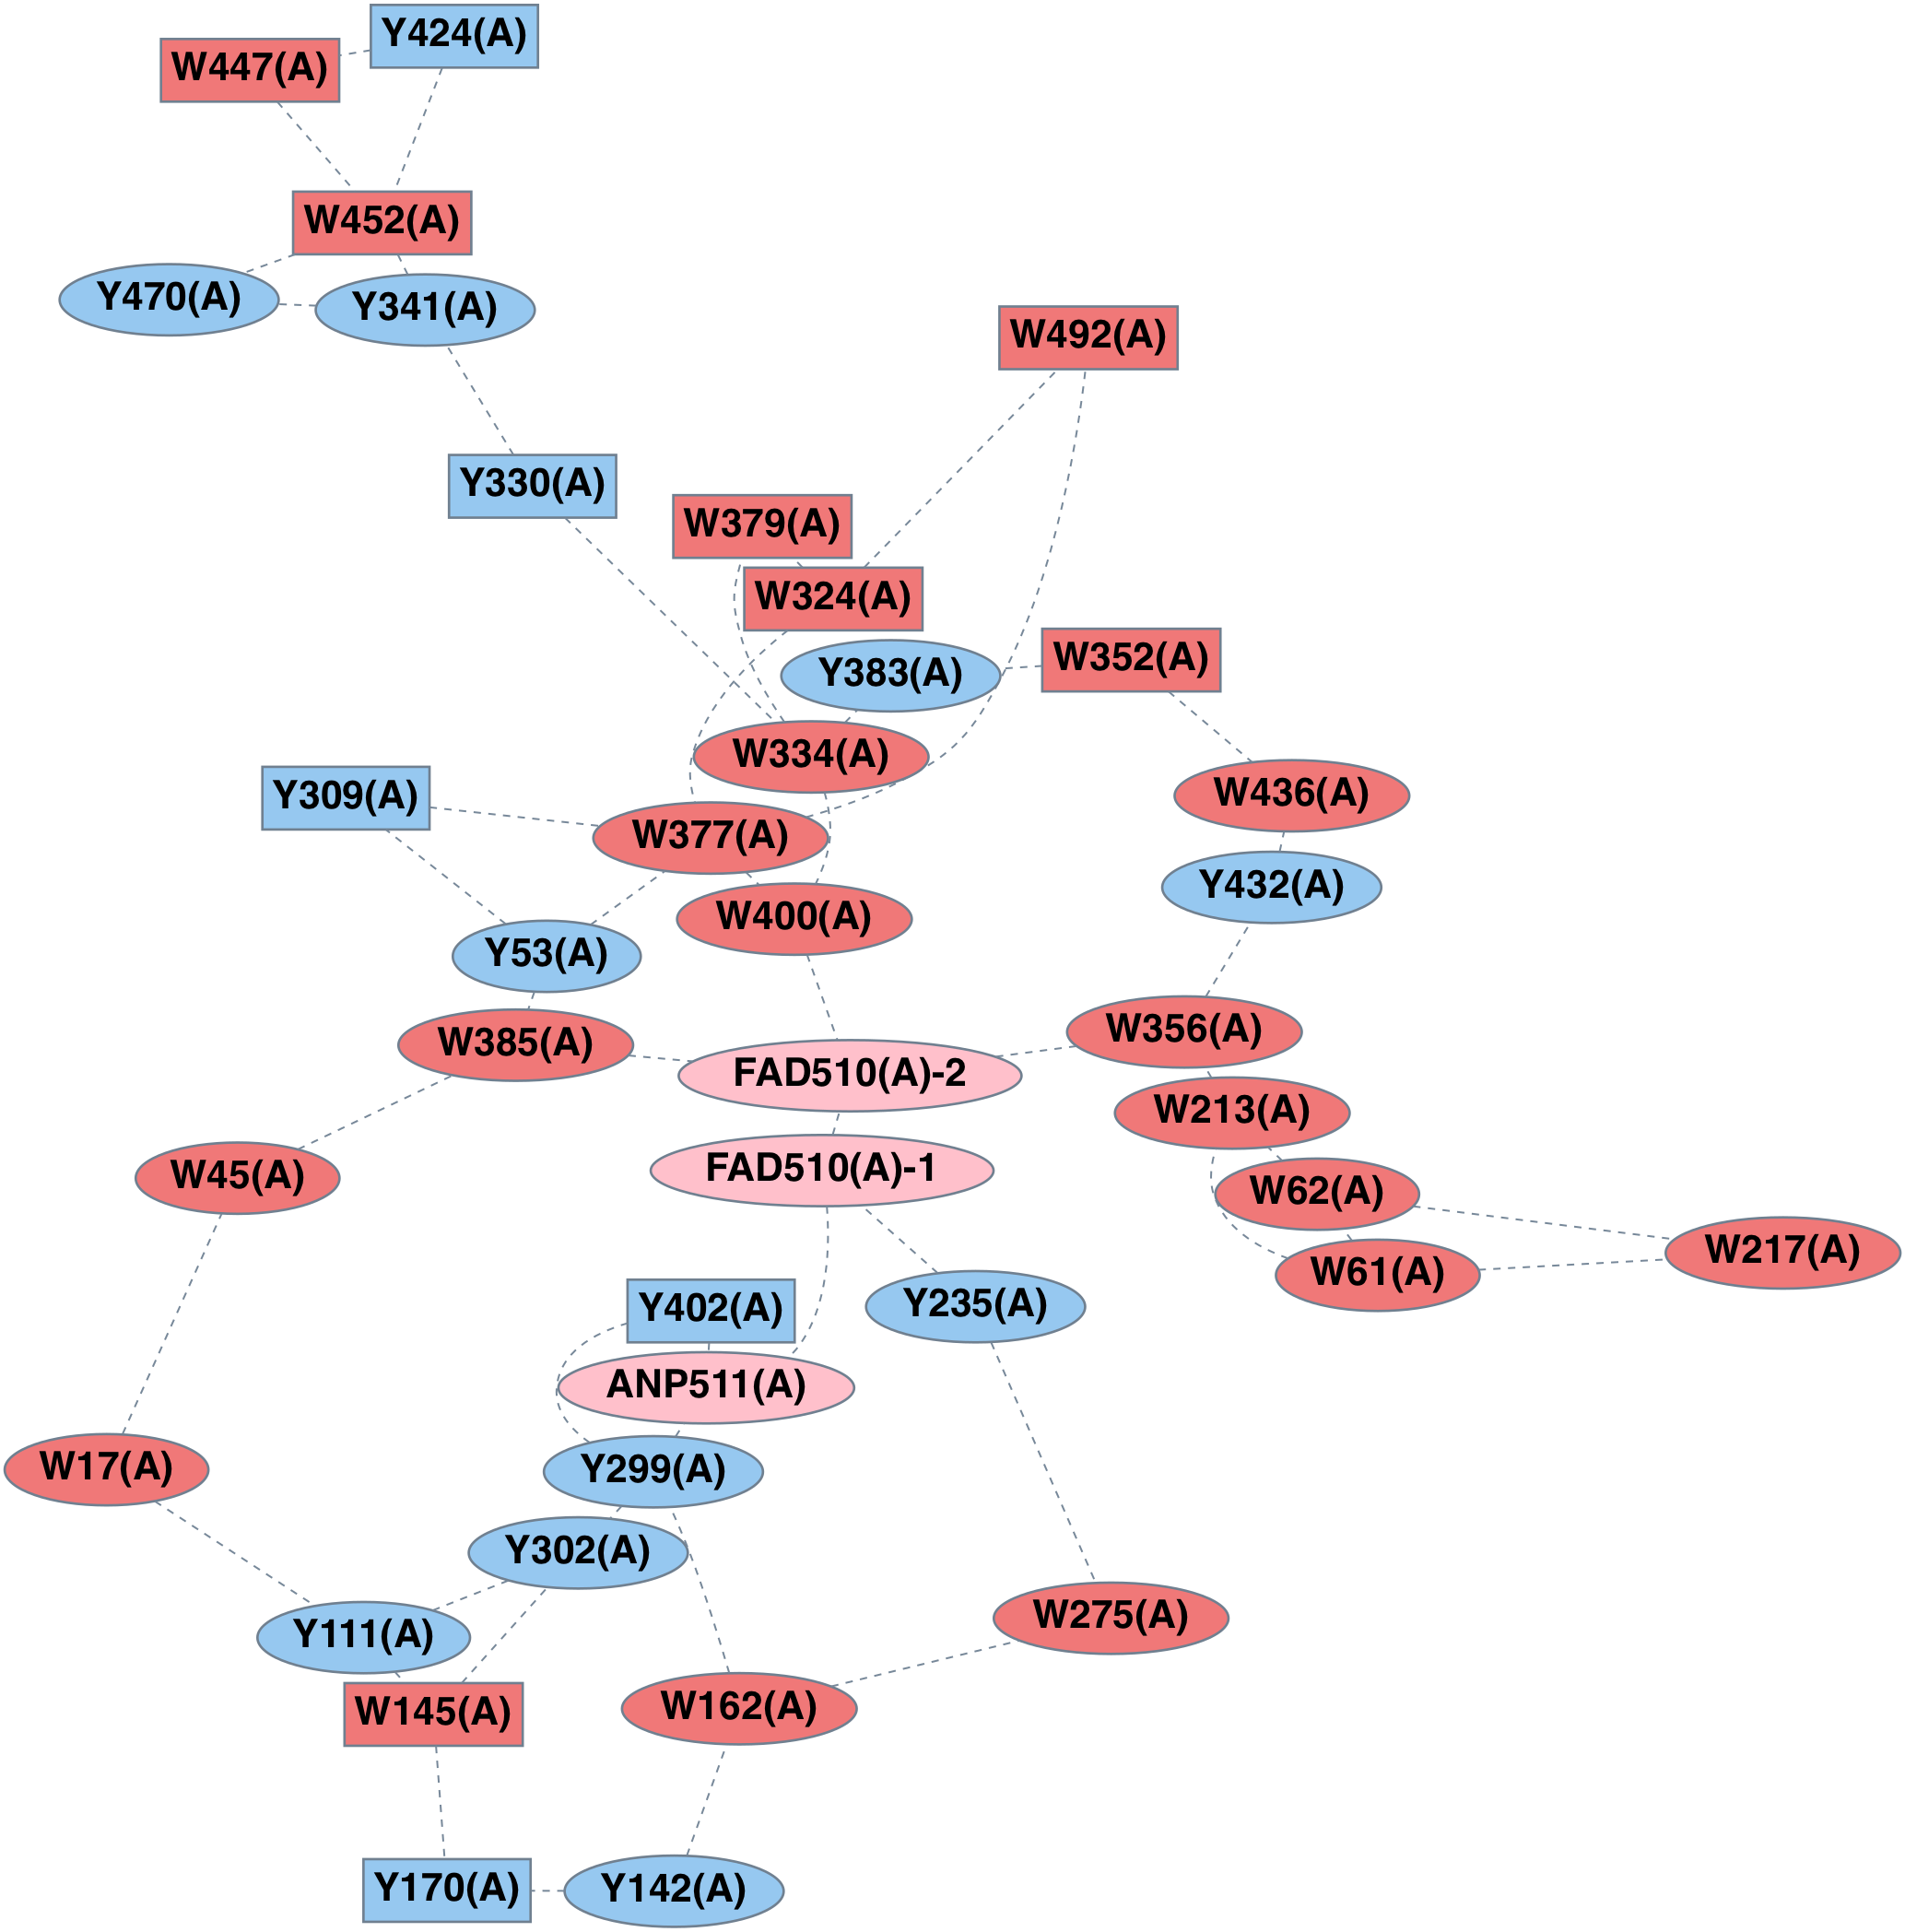

In [3]:
pyemap.process(my_emap)
my_emap.init_graph_to_Image()

Surface exposed residues appear as rectangular nodes, while buried residues appear as oval nodes. Edge weights are proportional to distances between residues. By default, all Trp, Tyr, and automatically detected non-protein electron transfer active moieties are included.

There are various parameters one can specify to control which residues are included in the graph, and the overall connectivity of the graph. For example, to include phenylalanine residues, and to modify the pure distance filter for edges, do:

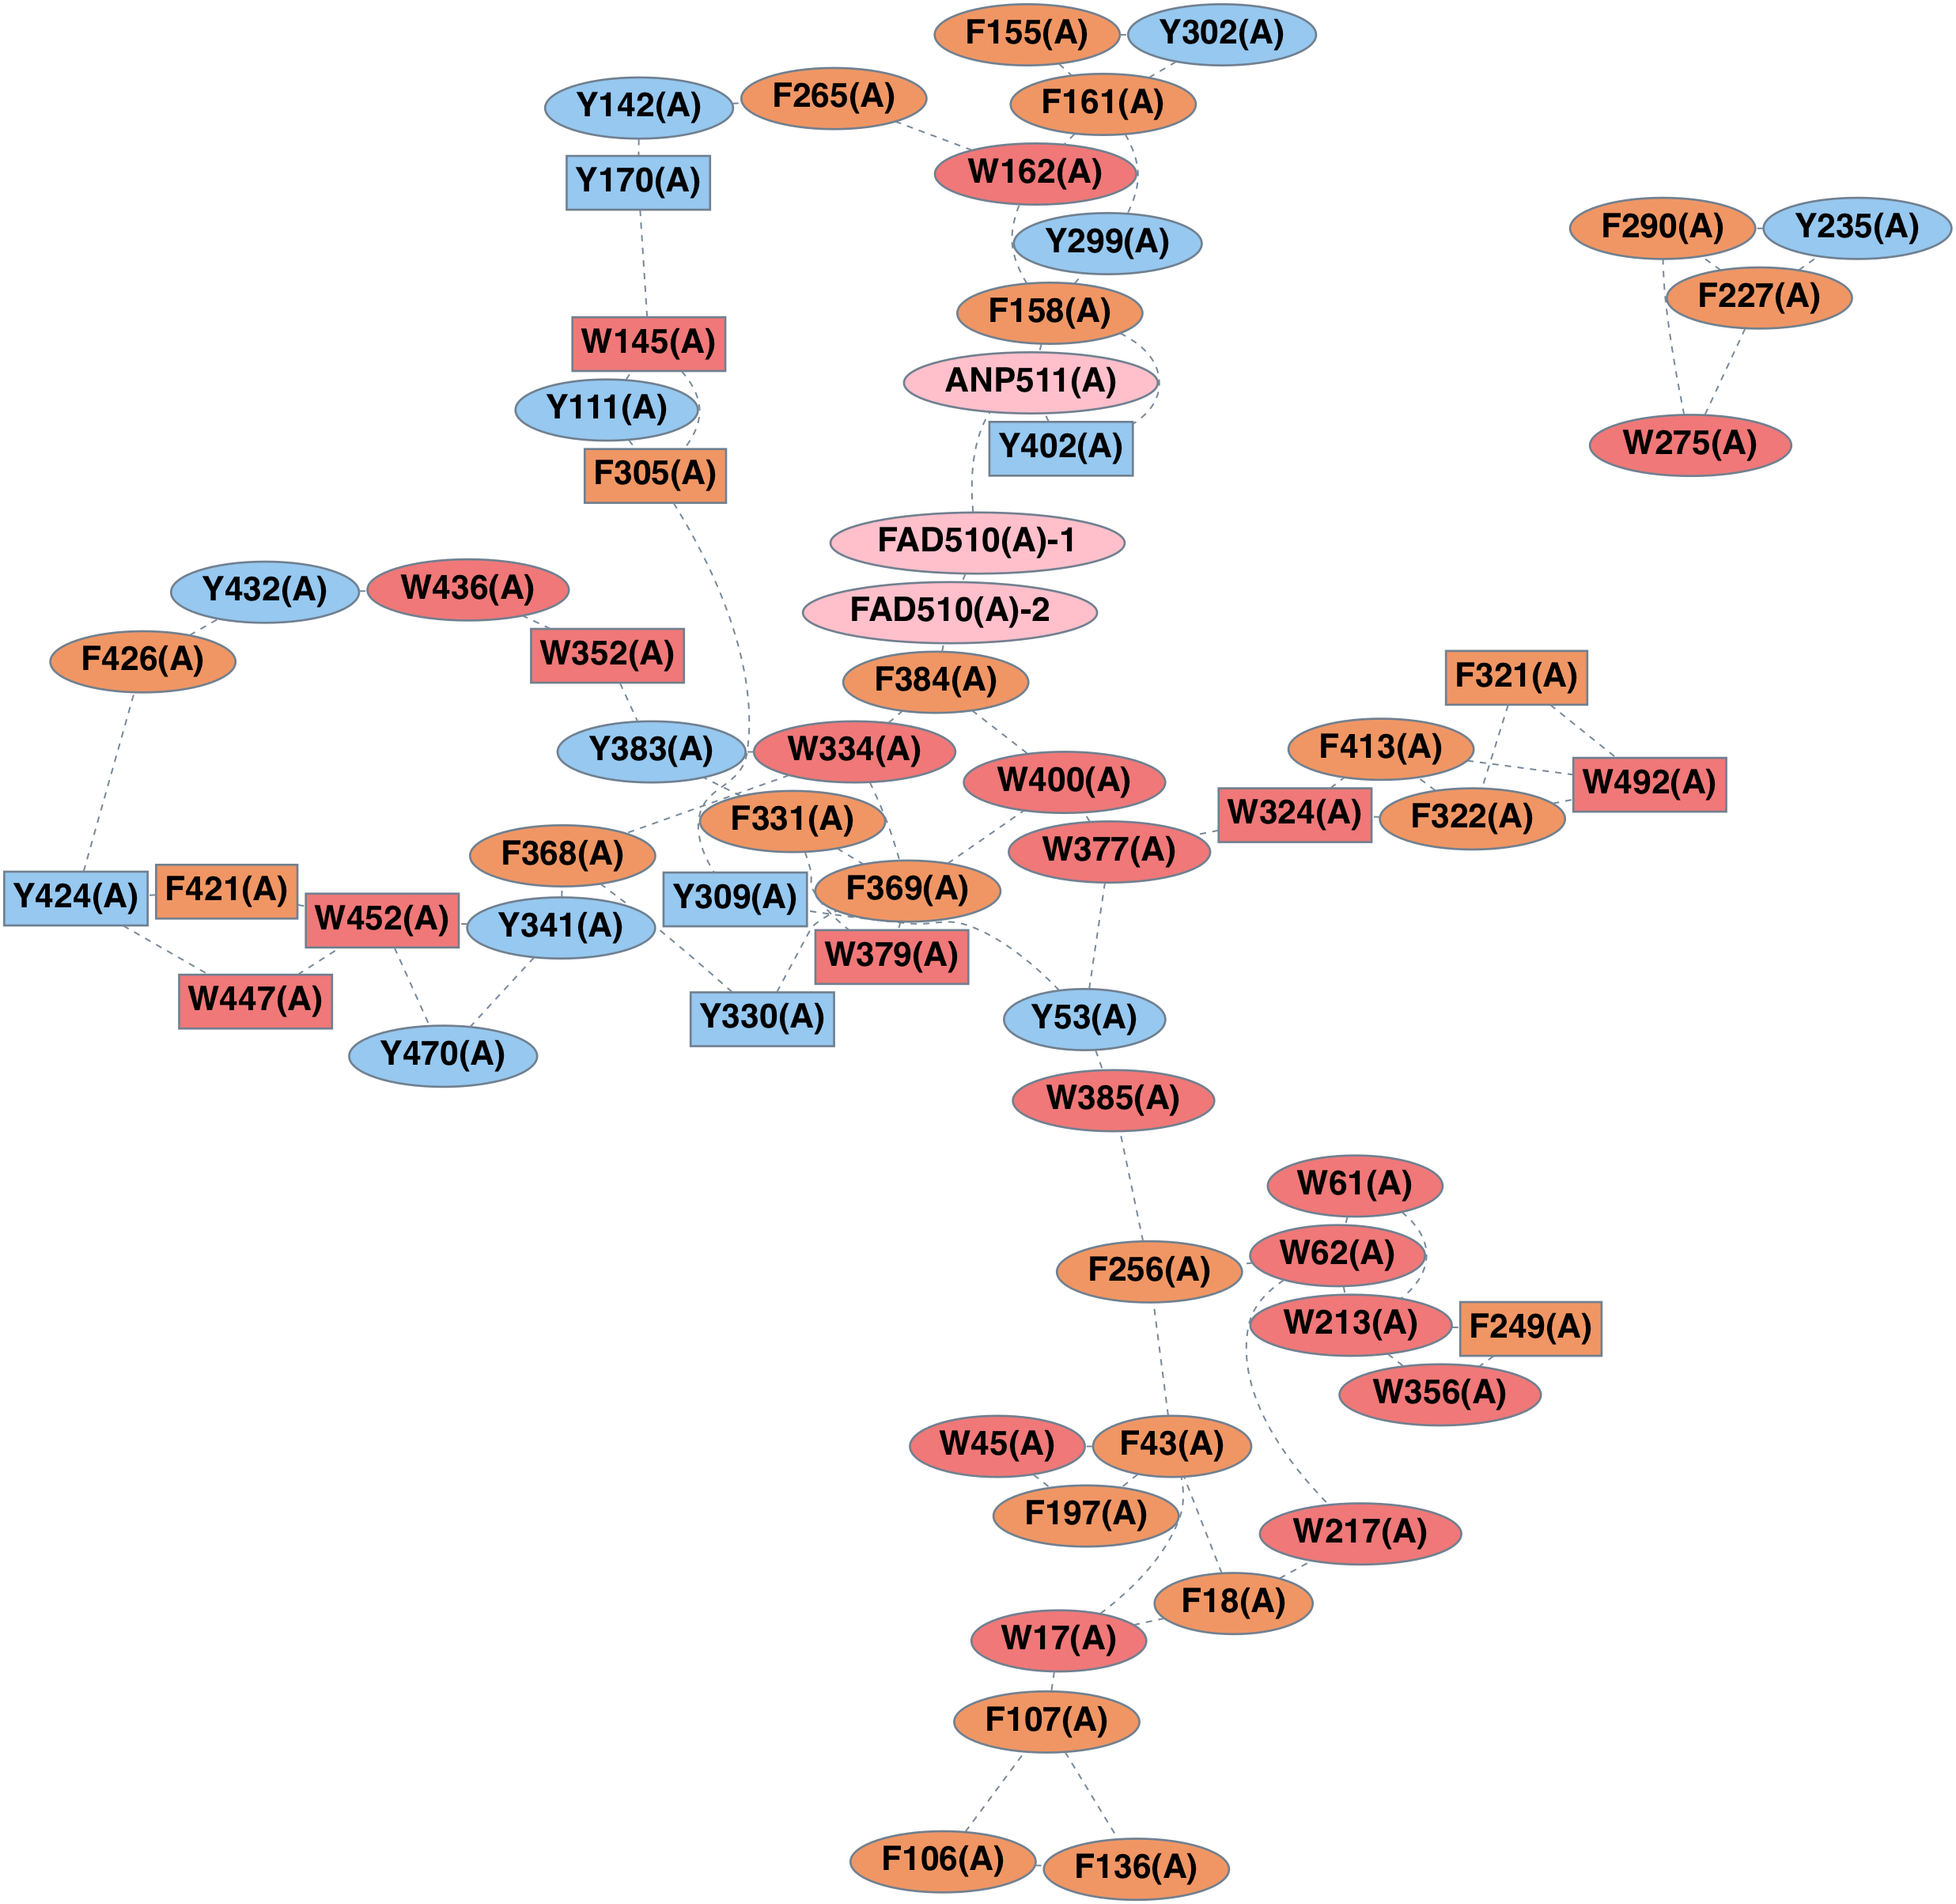

In [4]:
pyemap.process(my_emap,include_residues=["F","W","Y"],distance_cutoff=15)
my_emap.init_graph_to_Image()

# Find Pathways
Finally, search for possible pathways from a specified electron/hole donor to the surface using `pyemap.find_paths()`:

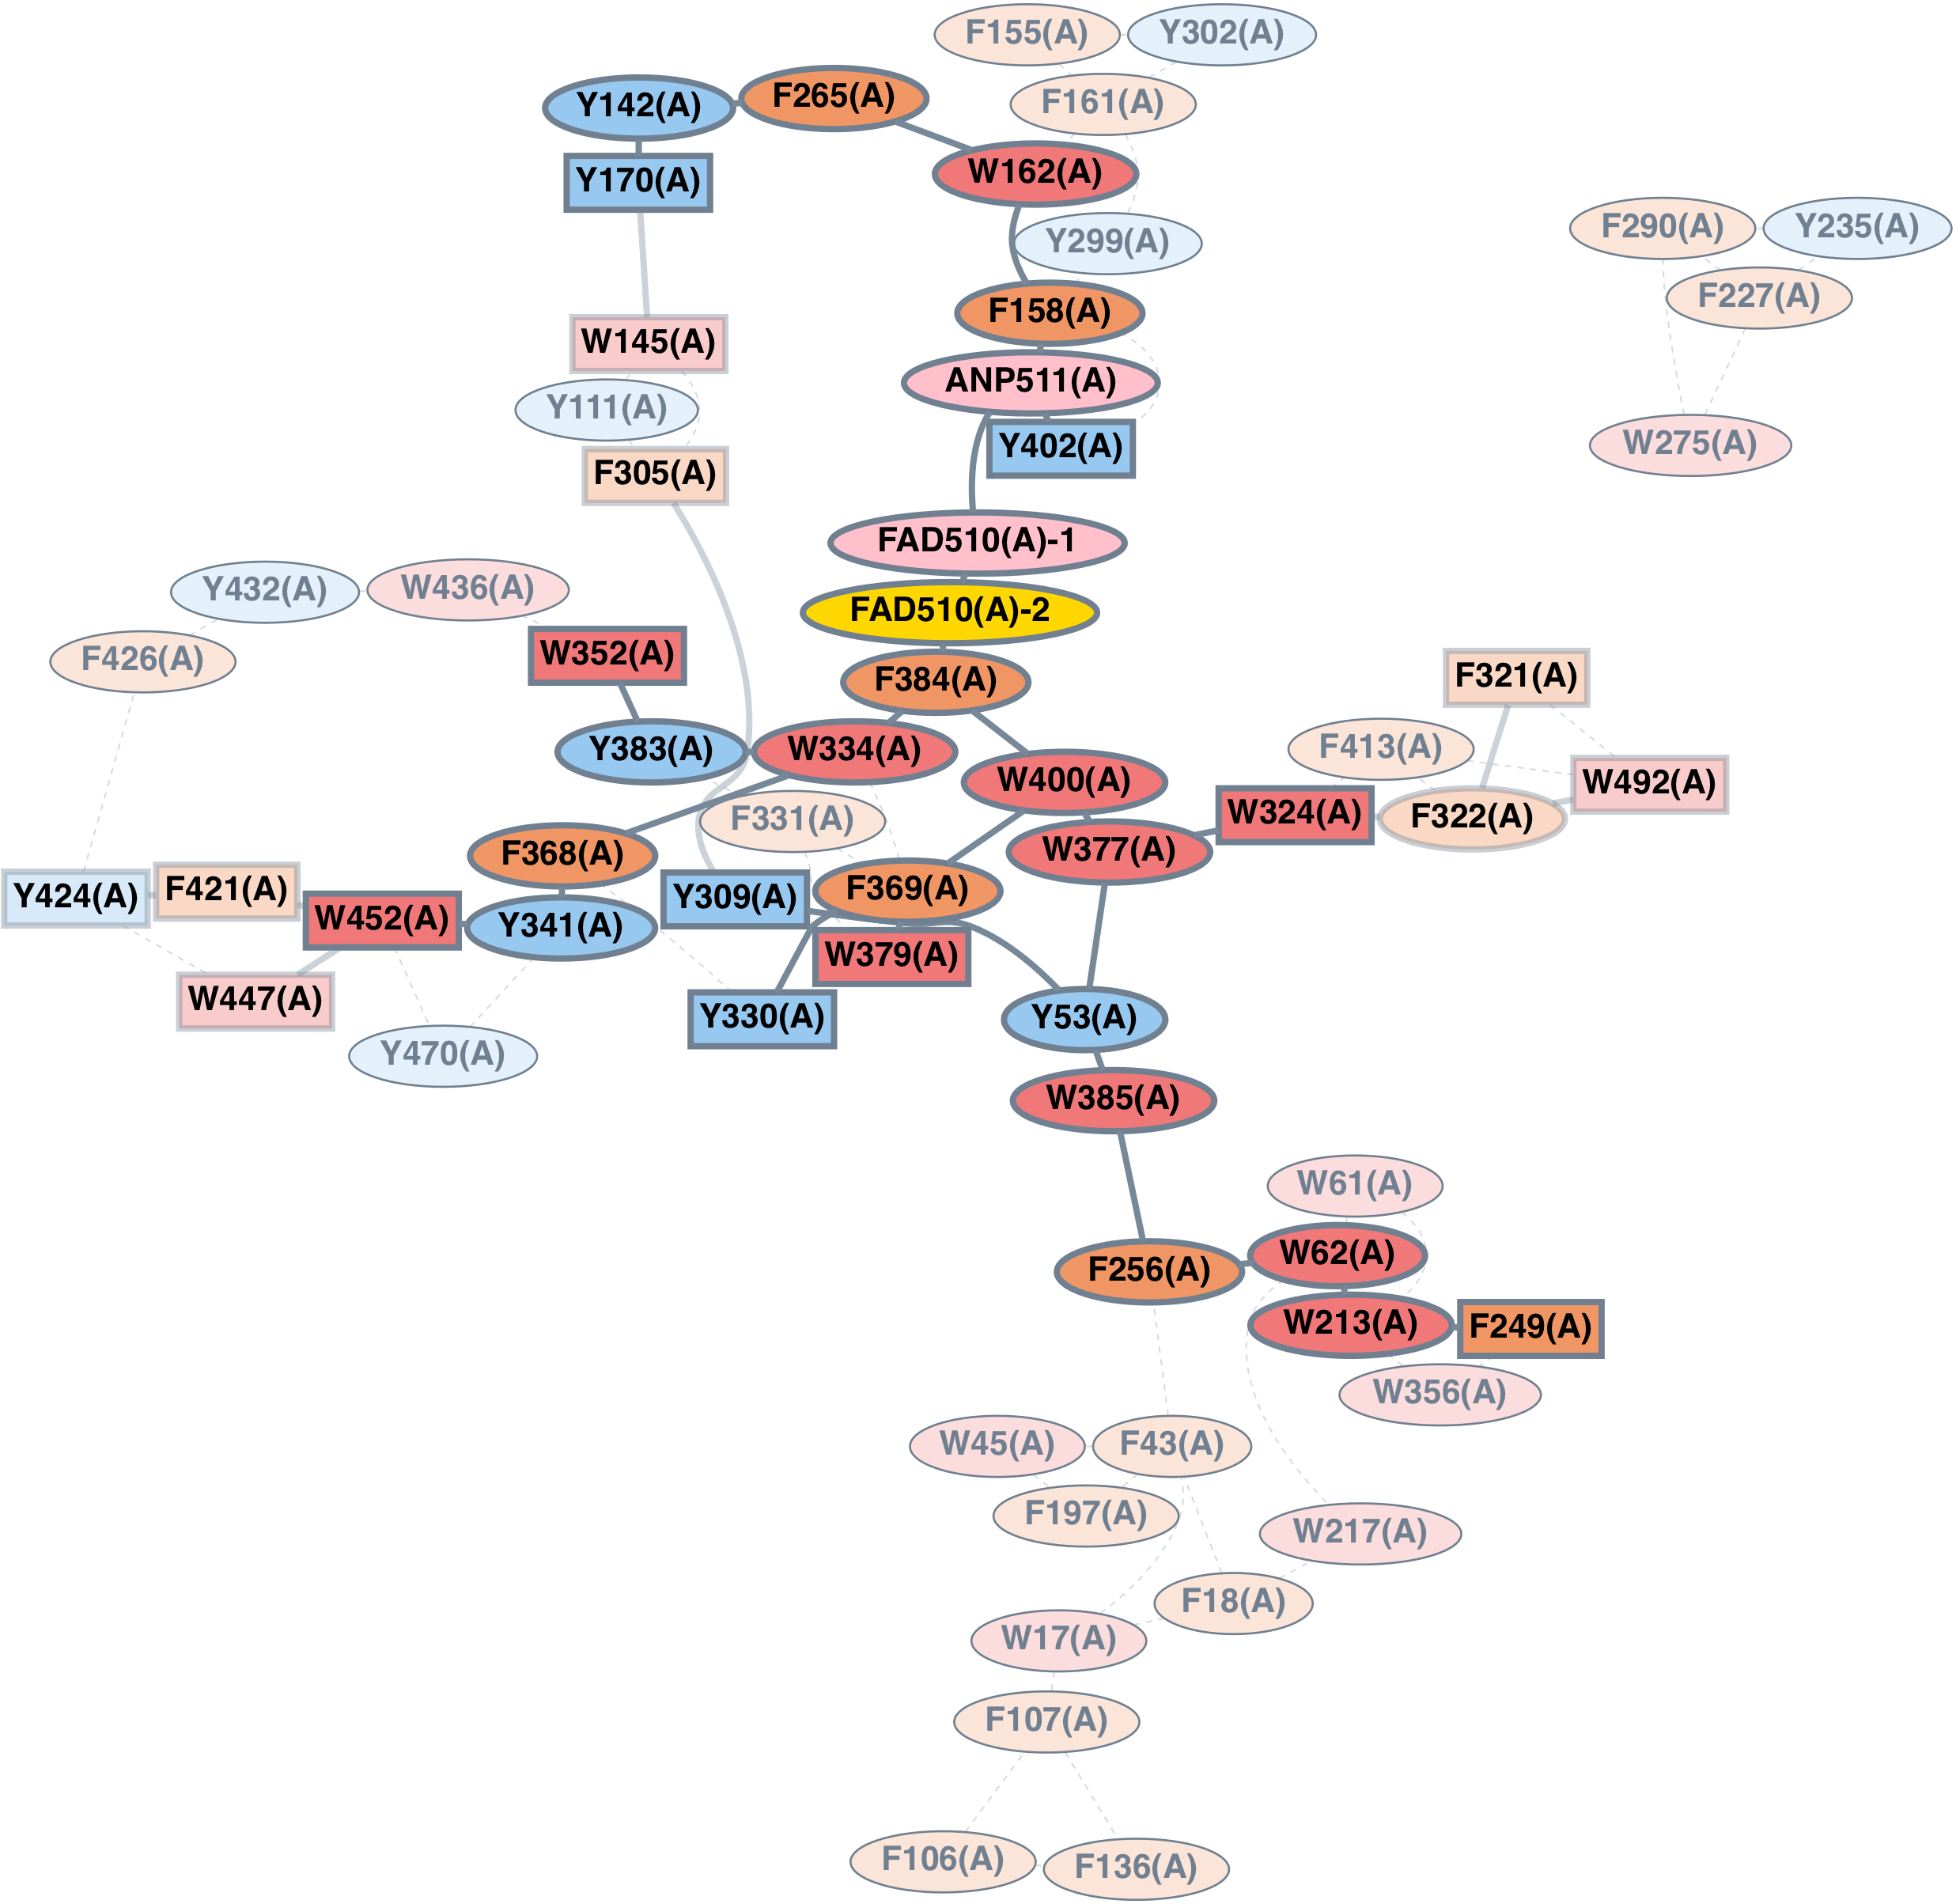

In [5]:
pyemap.find_paths(my_emap,"FAD510(A)-2")
my_emap.paths_graph_to_Image()

Alternatively, you can search for pathways from a specified donor to a particular acceptor:

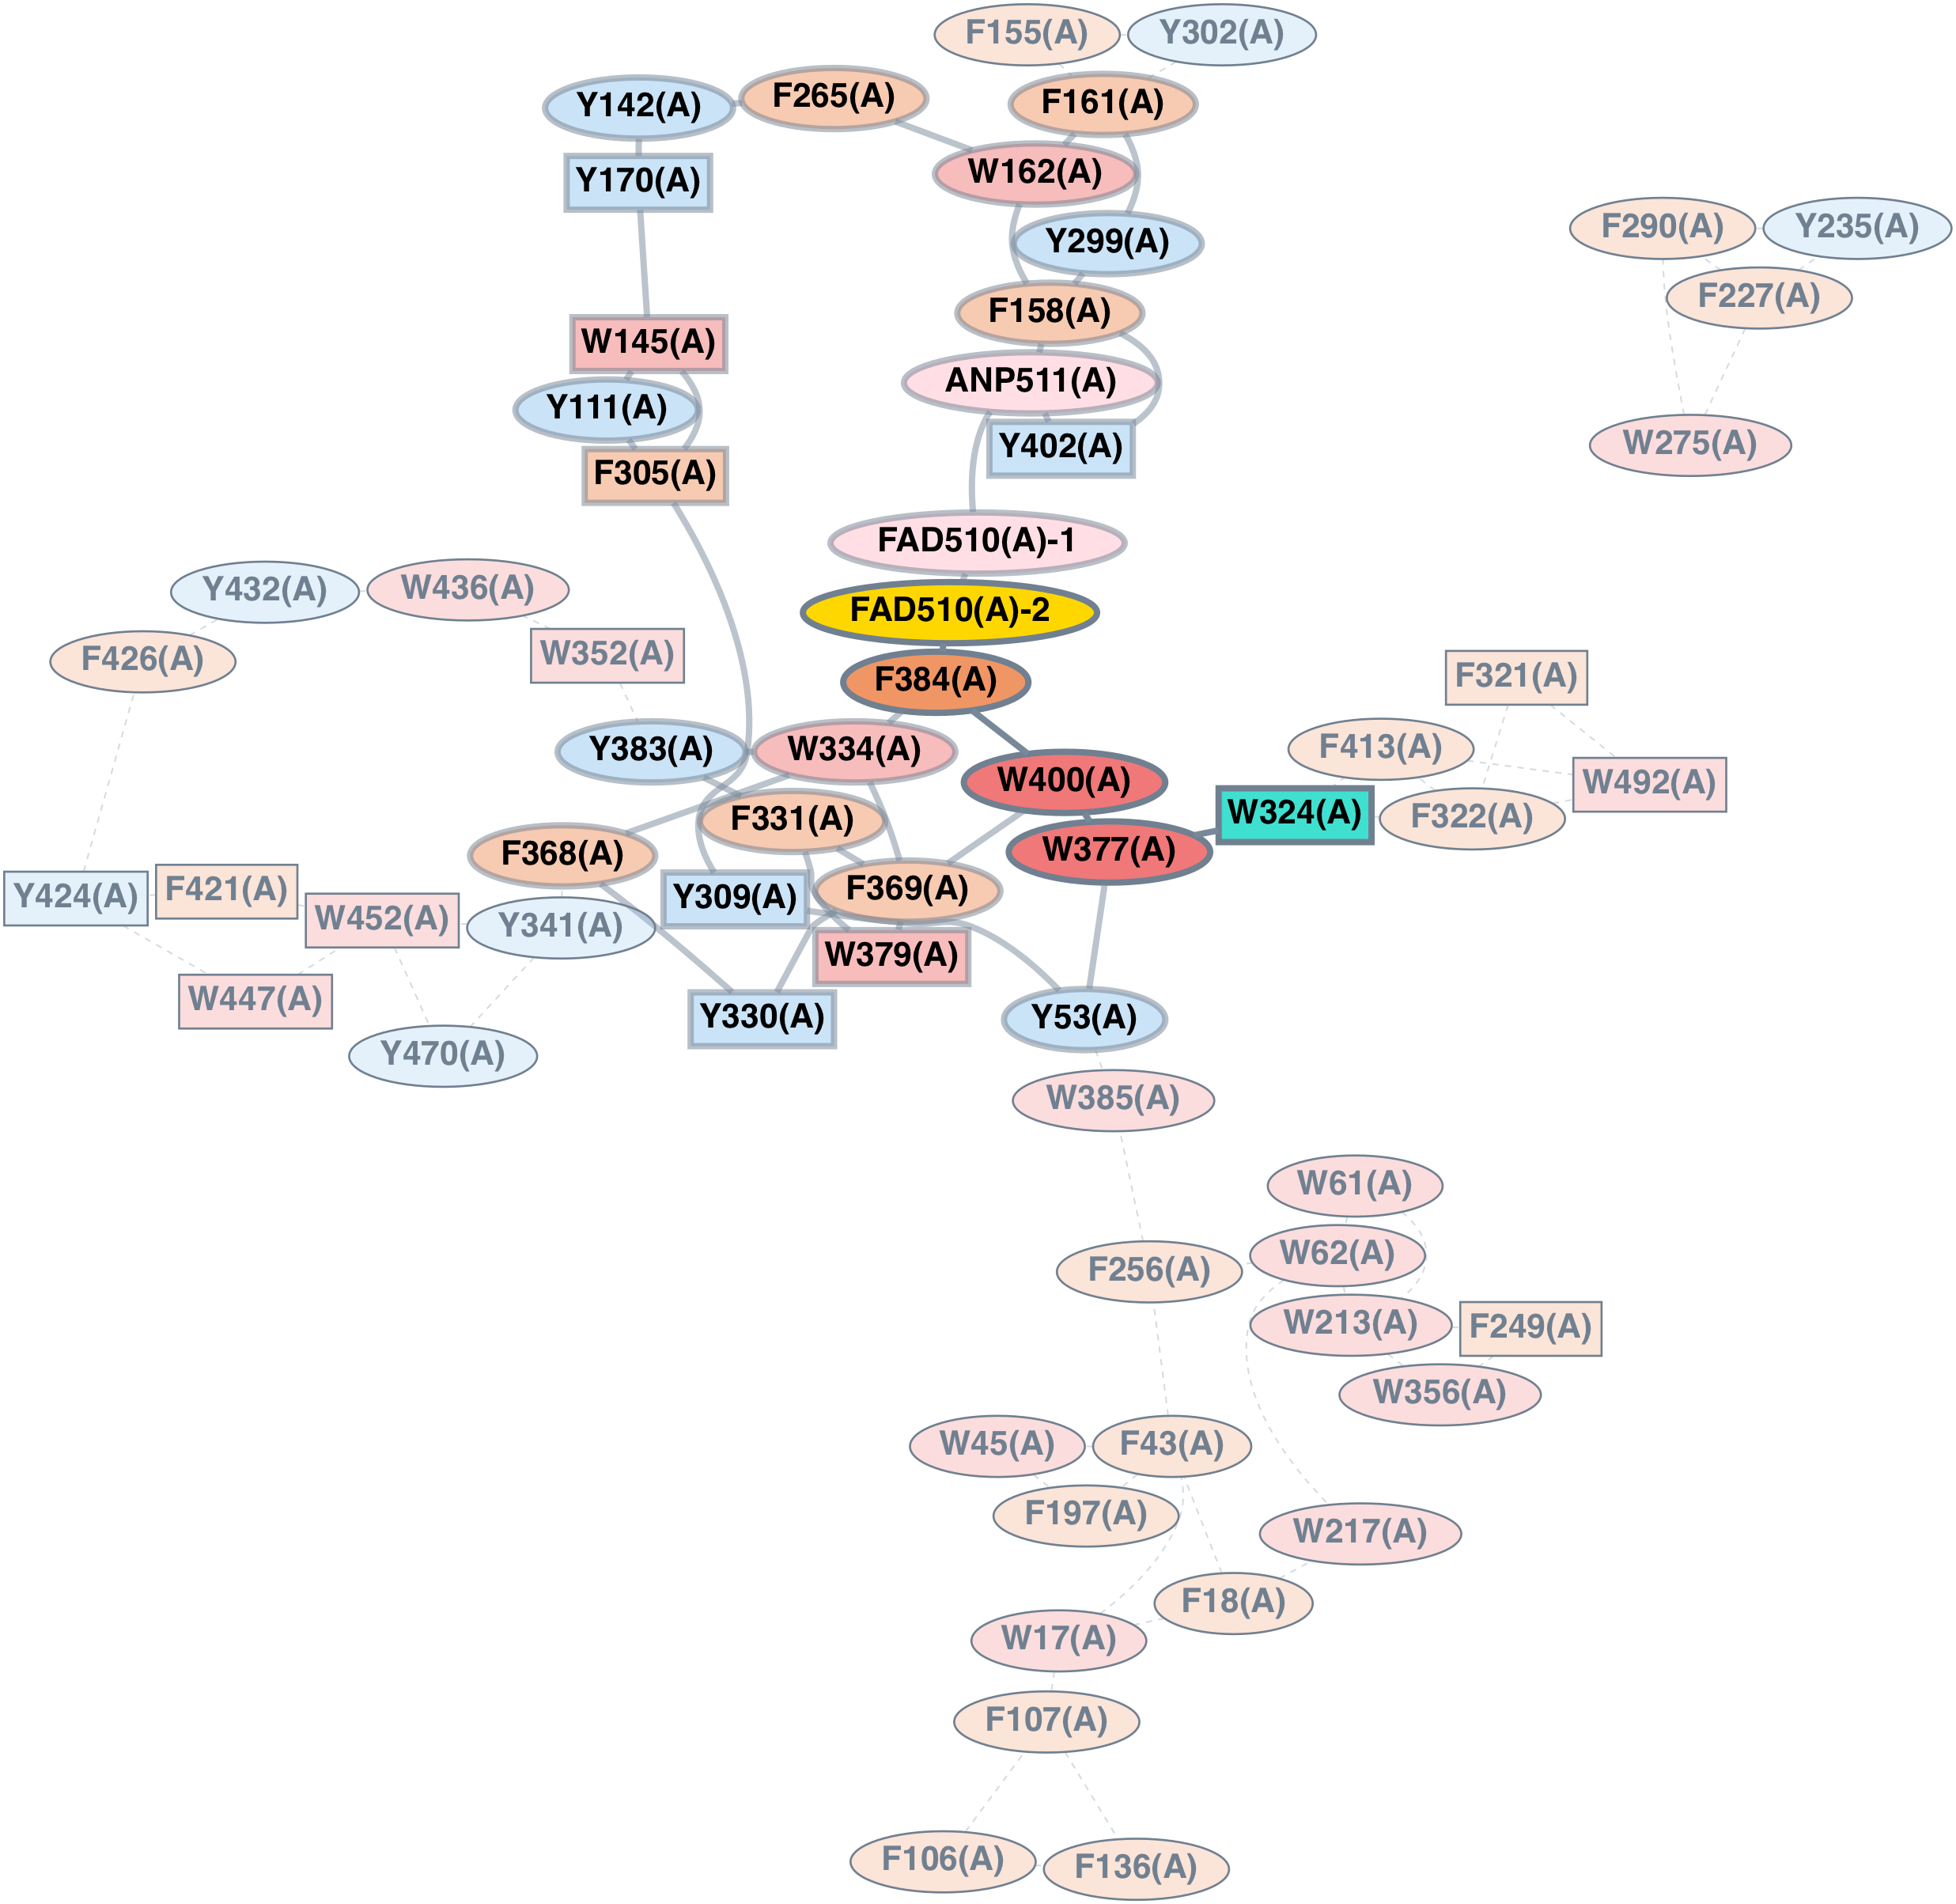

In [6]:
pyemap.find_paths(my_emap,"FAD510(A)-2", target = "W324(A)", max_paths=10)
my_emap.paths_graph_to_Image()

To get a report of the pathways found by pyemap, use `my_emap.report()`

In [7]:
print(my_emap.report())

Generated:
2022-01-26 00:29:47.688126
Parameters:
{'dist_def': 'COM', 'sdef': 'RSA', 'edge_prune': 'PERCENT', 'custom': '', 'distance_cutoff': 15, 'max_degree': 4, 'percent_edges': 1.0, 'num_st_dev_edges': 1.0, 'rd_thresh': 3.03, 'rsa_thresh': 0.2, 'coef_alpha': 1.0, 'exp_beta': 2.3, 'r_offset': 0.0}
Included residues:
['F', 'W', 'Y']
Active chains:
['A']
Included non protein moieties:
['FAD510(A)-1', 'FAD510(A)-2', 'ANP511(A)']
User defined residues:
{}

Pathways:
Branch: W324(A)
1a: ['FAD510(A)-2', 'F384(A)', 'W400(A)', 'W377(A)', 'W324(A)'] 27.34
Edge weights: [6.96, 5.02, 7.23, 8.13]
1b: ['FAD510(A)-2', 'F384(A)', 'W334(A)', 'F369(A)', 'W400(A)', 'W377(A)', 'W324(A)'] 39.48
Edge weights: [6.96, 6.85, 4.31, 6.01, 7.23, 8.13]
1c: ['FAD510(A)-2', 'F384(A)', 'W334(A)', 'Y383(A)', 'F331(A)', 'F369(A)', 'W400(A)', 'W377(A)', 'W324(A)'] 54.50
Edge weights: [6.96, 6.85, 6.43, 6.88, 6.02, 6.01, 7.23, 8.13]
1d: ['FAD510(A)-2', 'F384(A)', 'W334(A)', 'Y383(A)', 'F331(A)', 'W379(A)', 'F369(A)',

# Interacting with the emap object
The emap object manages all of the data at every stage of the analysis, and this data is accessible through its attributes and functions.

## Dictionaries
Much of the data on residues is stored in various dictionaries, where the key is residue name as it appears in the graph image. For example, to directly access the Biopython Residue object corresponding to the node W324(A) do:

In [8]:
residue_obj = my_emap.residues["W324(A)"]
print(residue_obj)

<Residue TRP het=  resseq=324 icode= >


We can do the same sort of thing with pathways, which are stored as ShortestPath objects. Any pathway(and by extension its attributes) can be accessed by its pathway ID. For example, if you want the selection string for visualization of pathway 1a in the NGL viewer, do:

# Graphs
The graphs are stored in the emap object as NetworkX Graph objects. The attributes of edges and vertices can be accessed from these graphs in usual NetworkX fashion (see their documentation for more information). For example, to access the weight of the edge connecting vertices W377(A) and W400(A), do:

In [9]:
weight = my_emap.init_graph.edges[("W377(A)","W400(A)")]['weight']
print(weight)

7.230936434632114


If what you need instead is the actual distance, this information is also kept:

In [10]:
dist = my_emap.init_graph.edges[("W377(A)","W400(A)")]['distance']
print(dist)

7.239063670770182


# Visualization
Graph images and chemical structures of non-protein electron transfer active moieties can be exported to PIL with the `residue_to_Image()`, `init_graph_to_Image()`, `paths_graph_to_Image()` functions. To save to file, use `paths_graph_to_file()`, `init_graph_to_file()`, and `residue_to_file()`.

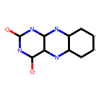

In [11]:
my_emap.residue_to_Image("FAD510(A)-2")

## NGL View
Using the [nglview](https://github.com/nglviewer/nglview) widget, one can visualize pathways in the protein structure.

In [12]:
import nglview as nv
view = nv.show_file(my_emap.file_path)
view.clear_representations()
view.add_cartoon(color="lightgray")
my_emap.visualize_pathway_in_nglview("1a",view)
view

NGLWidget()